## Feature Engineering

In [14]:
import pandas as pd

In [57]:
df = pd.read_csv("tunnel_length_prediction.csv")

In [58]:
df.head()

,original_name_address,competitors_count,competitor_1_distance_miles,competitor_1_google_rating,competitor_1_google_user_rating_count,competitor_2_distance_miles,competitor_2_google_rating,competitor_2_google_user_rating_count,nearby_traffic_lights_count,distance_nearest_traffic_light_1,...,total_precipitation_mm,rainy_days,total_snowfall_cm,snowy_days,days_below_freezing,total_sunshine_hours,days_pleasant_temp,avg_daily_max_windspeed_ms,type_of_lot,tunnel_length
0,"*** StoneWash *** Car Care Center , 818 Paris ...",1.0,0.029545,4.1,51.0,NaN,NaN,NaN,14.0,0.150351,...,1319.41,121.6,17.409,10.0,49.1,3163.838297,126.1,15.496726,Inside,#VALUE!
1,"A-KEY CAR WASH , 2210 N Prince St , Clovis , N...",4.0,0.513618,2.0,1.0,0.601399,4.0,68.0,29.0,0.128615,...,326.92,48.1,23.555,13.6,59.6,3751.918701,131.4,24.565802,Inside,86.06020305
2,"ALL STAR CAR WASH , 5835 N Market St , Shrevep...",0.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,0.128080,...,1347.06,118.1,4.382,1.5,12.3,3207.536250,140.2,16.900748,Inside,#VALUE!
3,"Abercorn , 10509 Abercorn St , Savannah , GA ,...",3.0,0.451116,4.7,185.0,0.513824,4.3,871.0,30.0,0.144588,...,1314.13,139.4,0.371,0.1,3.3,3385.144401,166.1,19.368015,Corner,166.175688
4,"Alabaster Wash and Wax , 916 1st St S , Alabas...",0.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,0.221173,...,1408.98,130.8,2.135,1.5,23.1,3244.371979,151.6,14.483850,Inside,103.6520865


In [59]:
df.shape

(536, 41)

In [60]:
df.columns

Index(['original_name_address', 'competitors_count',
       'competitor_1_distance_miles', 'competitor_1_google_rating',
       'competitor_1_google_user_rating_count', 'competitor_2_distance_miles',
       'competitor_2_google_rating', 'competitor_2_google_user_rating_count',
       'nearby_traffic_lights_count', 'distance_nearest_traffic_light_1',
       'distance_nearest_traffic_light_2', 'distance_nearest_traffic_light_3',
       'distance_nearest_traffic_light_4', 'distance_nearest_traffic_light_5',
       'distance_nearest_traffic_light_6', 'distance_nearest_traffic_light_7',
       'distance_nearest_traffic_light_8', 'distance_nearest_traffic_light_9',
       'distance_nearest_traffic_light_10', 'distance_nearestroad_1',
       'nearestroad_1_maxspeed', 'distance_nearestroad_2',
       'nearestroad_2_maxspeed', 'distance_nearestroad_3',
       'nearestroad_3_maxspeed', 'distance_nearestroad_4',
       'nearestroad_4_maxspeed', 'distance_nearestroad_5',
       'nearestroad_5_maxs

In [61]:
df = df.drop(['original_name_address',
       'distance_nearest_traffic_light_4', 'distance_nearest_traffic_light_5',
       'distance_nearest_traffic_light_6', 'distance_nearest_traffic_light_7',
       'distance_nearest_traffic_light_8', 'distance_nearest_traffic_light_9',
       'distance_nearest_traffic_light_10',
       'distance_nearestroad_4',
       'nearestroad_4_maxspeed',
       'distance_nearestroad_5', 'nearestroad_5_maxspeed',
       'total_precipitation_mm', 'total_snowfall_cm',
        'total_sunshine_hours',], axis=1)

In [62]:
df.shape

(536, 26)

In [63]:
df.columns

Index(['competitors_count', 'competitor_1_distance_miles',
       'competitor_1_google_rating', 'competitor_1_google_user_rating_count',
       'competitor_2_distance_miles', 'competitor_2_google_rating',
       'competitor_2_google_user_rating_count', 'nearby_traffic_lights_count',
       'distance_nearest_traffic_light_1', 'distance_nearest_traffic_light_2',
       'distance_nearest_traffic_light_3', 'distance_nearestroad_1',
       'nearestroad_1_maxspeed', 'distance_nearestroad_2',
       'nearestroad_2_maxspeed', 'distance_nearestroad_3',
       'nearestroad_3_maxspeed', 'distance_from_nearest_walmart',
       'count_of_walmart_5miles', 'rainy_days', 'snowy_days',
       'days_below_freezing', 'days_pleasant_temp',
       'avg_daily_max_windspeed_ms', 'type_of_lot', 'tunnel_length'],
      dtype='object')

In [64]:
df = df[df['tunnel_length'] != '#VALUE!']

In [65]:
df.shape

(428, 26)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 428 entries, 1 to 535
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   competitors_count                      393 non-null    float64
 1   competitor_1_distance_miles            218 non-null    float64
 2   competitor_1_google_rating             200 non-null    float64
 3   competitor_1_google_user_rating_count  200 non-null    float64
 4   competitor_2_distance_miles            91 non-null     float64
 5   competitor_2_google_rating             81 non-null     float64
 6   competitor_2_google_user_rating_count  81 non-null     float64
 7   nearby_traffic_lights_count            392 non-null    float64
 8   distance_nearest_traffic_light_1       390 non-null    float64
 9   distance_nearest_traffic_light_2       385 non-null    float64
 10  distance_nearest_traffic_light_3       373 non-null    float64
 11  distance_ne

In [67]:
# Create a dictionary to hold the values for filling NaN
fill_values = {}

# Loop through all columns in the DataFrame
for col in df.columns:
    if 'distance' in col:
        fill_values[col] = 10
    elif 'rating' in col and 'count' not in col: # Exclude 'rating_count' columns
        fill_values[col] = 2.5
    elif 'count' in col:
        fill_values[col] = 0
    elif 'maxspeed' in col:
        fill_values[col] = 0

# Use the generated dictionary to fill all specified NaN values in one go
df.fillna(value=fill_values, inplace=True)

# Optional: Verify the changes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 428 entries, 1 to 535
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   competitors_count                      428 non-null    float64
 1   competitor_1_distance_miles            428 non-null    float64
 2   competitor_1_google_rating             428 non-null    float64
 3   competitor_1_google_user_rating_count  428 non-null    float64
 4   competitor_2_distance_miles            428 non-null    float64
 5   competitor_2_google_rating             428 non-null    float64
 6   competitor_2_google_user_rating_count  428 non-null    float64
 7   nearby_traffic_lights_count            428 non-null    float64
 8   distance_nearest_traffic_light_1       428 non-null    float64
 9   distance_nearest_traffic_light_2       428 non-null    float64
 10  distance_nearest_traffic_light_3       428 non-null    float64
 11  distance_ne

In [68]:
import pandas as pd

# --- Step 1: Clean and convert 'maxspeed' columns ---
# List of columns to clean
maxspeed_cols = ['nearestroad_1_maxspeed', 'nearestroad_2_maxspeed', 'nearestroad_3_maxspeed']

for col in maxspeed_cols:
    # Convert the column to string type to use string methods
    df[col] = df[col].astype(str)
    # Remove ' mph' and convert to a numeric type
    df[col] = pd.to_numeric(df[col].str.replace(' mph', ''), errors='coerce')

# Fill any NaNs that might have been created during conversion with 0
df[maxspeed_cols] = df[maxspeed_cols].fillna(0)


# --- Step 2: Convert other object columns to numeric ---
# List of columns that should be numeric but are stored as object
other_object_cols = ['distance_nearestroad_1', 'distance_nearestroad_2', 'distance_nearestroad_3', 'tunnel_length']

for col in other_object_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    # Fill any potential NaNs created during conversion
    df[col] = df[col].fillna(0)


# --- Step 3: Map 'type_of_lot' to specified numeric values ---
# Create the dictionary for mapping
lot_type_mapping = {
    'Corner': 1,
    'Inside': 0
}

# Apply the mapping to the column.
# This will replace 'Corner' with 1 and 'Inside' with 2.
# Any value in the column not in the map's keys will become NaN.
df['type_of_lot'] = df['type_of_lot'].map(lot_type_mapping)

# It's good practice to fill any potential NaNs if there were unexpected values.
# Let's assume any other value should be 0 or another default.
df['type_of_lot'] = df['type_of_lot'].fillna(0) # Or another value if it makes sense


# --- Final Verification ---
# Display the data types and info to confirm all columns are numeric
print("Conversion complete. Final DataFrame info:")
print(df.info())

Conversion complete. Final DataFrame info:
<class 'pandas.core.frame.DataFrame'>
Index: 428 entries, 1 to 535
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   competitors_count                      428 non-null    float64
 1   competitor_1_distance_miles            428 non-null    float64
 2   competitor_1_google_rating             428 non-null    float64
 3   competitor_1_google_user_rating_count  428 non-null    float64
 4   competitor_2_distance_miles            428 non-null    float64
 5   competitor_2_google_rating             428 non-null    float64
 6   competitor_2_google_user_rating_count  428 non-null    float64
 7   nearby_traffic_lights_count            428 non-null    float64
 8   distance_nearest_traffic_light_1       428 non-null    float64
 9   distance_nearest_traffic_light_2       428 non-null    float64
 10  distance_nearest_traffic_light_3    

In [69]:
df.head()

,competitors_count,competitor_1_distance_miles,competitor_1_google_rating,competitor_1_google_user_rating_count,competitor_2_distance_miles,competitor_2_google_rating,competitor_2_google_user_rating_count,nearby_traffic_lights_count,distance_nearest_traffic_light_1,distance_nearest_traffic_light_2,...,nearestroad_3_maxspeed,distance_from_nearest_walmart,count_of_walmart_5miles,rainy_days,snowy_days,days_below_freezing,days_pleasant_temp,avg_daily_max_windspeed_ms,type_of_lot,tunnel_length
1,4.0,0.513618,2.0,1.0,0.601399,4.0,68.0,29.0,0.128615,0.200675,...,25.0,1.152828,1,48.1,13.6,59.6,131.4,24.565802,0,86.060203
3,3.0,0.451116,4.7,185.0,0.513824,4.3,871.0,30.0,0.144588,0.252166,...,40.0,2.415497,2,139.4,0.1,3.3,166.1,19.368015,1,166.175688
4,0.0,10.000000,2.5,0.0,10.000000,2.5,0.0,9.0,0.221173,0.328031,...,35.0,0.628948,1,130.8,1.5,23.1,151.6,14.483850,0,103.652086
5,1.0,0.314228,4.3,183.0,10.000000,2.5,0.0,25.0,0.063389,0.142691,...,45.0,2.548784,2,43.2,19.0,76.1,113.0,21.164968,1,181.732141
6,0.0,10.000000,2.5,0.0,10.000000,2.5,0.0,12.0,0.097910,0.397927,...,25.0,0.660587,1,60.7,42.4,199.7,106.2,17.341835,1,132.548970


In [100]:
df

,competitors_count,competitor_1_distance_miles,competitor_1_google_rating,competitor_1_google_user_rating_count,competitor_2_distance_miles,competitor_2_google_rating,competitor_2_google_user_rating_count,nearby_traffic_lights_count,distance_nearest_traffic_light_1,distance_nearest_traffic_light_2,...,nearestroad_3_maxspeed,distance_from_nearest_walmart,count_of_walmart_5miles,rainy_days,snowy_days,days_below_freezing,days_pleasant_temp,avg_daily_max_windspeed_ms,type_of_lot,tunnel_length
1,4.0,0.513618,2.0,1.0,0.601399,4.0,68.0,29.0,0.128615,0.200675,...,25.0,1.152828,1,48.1,13.6,59.6,131.4,24.565802,0,86.060203
3,3.0,0.451116,4.7,185.0,0.513824,4.3,871.0,30.0,0.144588,0.252166,...,40.0,2.415497,2,139.4,0.1,3.3,166.1,19.368015,1,166.175688
4,0.0,10.000000,2.5,0.0,10.000000,2.5,0.0,9.0,0.221173,0.328031,...,35.0,0.628948,1,130.8,1.5,23.1,151.6,14.483850,0,103.652086
5,1.0,0.314228,4.3,183.0,10.000000,2.5,0.0,25.0,0.063389,0.142691,...,45.0,2.548784,2,43.2,19.0,76.1,113.0,21.164968,1,181.732141
6,0.0,10.000000,2.5,0.0,10.000000,2.5,0.0,12.0,0.097910,0.397927,...,25.0,0.660587,1,60.7,42.4,199.7,106.2,17.341835,1,132.548970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,2.0,0.234932,2.5,0.0,0.878624,4.0,103.0,26.0,0.058492,0.266912,...,25.0,0.219269,1,101.6,5.7,34.8,118.5,17.697602,0,110.947468
531,4.0,0.017524,4.5,43.0,0.660408,4.2,209.0,17.0,0.047967,0.285286,...,30.0,0.474073,1,99.9,3.9,23.8,125.7,17.400582,1,96.678230
532,0.0,10.000000,2.5,0.0,10.000000,2.5,0.0,25.0,0.057048,0.192964,...,70.0,3.234189,2,118.4,19.0,77.3,126.0,15.514805,1,85.039813
534,0.0,10.000000,2.5,0.0,10.000000,2.5,0.0,17.0,0.070506,0.347863,...,45.0,2.495832,1,151.6,38.0,89.6,145.4,16.055902,0,119.318566


In [101]:
df.to_csv('tunnel_length_prediction_cleaned.csv', index=False)

## Modeling

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np
# from scipy.stats import randint

In [84]:
y = df['tunnel_length']
X = df.drop('tunnel_length', axis=1)

In [94]:
X.columns

Index(['competitors_count', 'competitor_1_distance_miles',
       'competitor_1_google_rating', 'competitor_1_google_user_rating_count',
       'competitor_2_distance_miles', 'competitor_2_google_rating',
       'competitor_2_google_user_rating_count', 'nearby_traffic_lights_count',
       'distance_nearest_traffic_light_1', 'distance_nearest_traffic_light_2',
       'distance_nearest_traffic_light_3', 'distance_nearestroad_1',
       'nearestroad_1_maxspeed', 'distance_nearestroad_2',
       'nearestroad_2_maxspeed', 'distance_nearestroad_3',
       'nearestroad_3_maxspeed', 'distance_from_nearest_walmart',
       'count_of_walmart_5miles', 'rainy_days', 'snowy_days',
       'days_below_freezing', 'days_pleasant_temp',
       'avg_daily_max_windspeed_ms', 'type_of_lot'],
      dtype='object')

In [85]:
y.shape, X.shape

((428,), (428, 25))

In [86]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [87]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [88]:
y_pred = model.predict(X_test)


In [90]:
y_pred

array([120.01096506, 128.79299883, 106.52118991, 112.88982131,
       118.1923599 , 118.63179804, 116.94051337, 125.97517414,
       112.15300683, 122.95788887, 115.18027805, 118.35596395,
       125.18827394, 110.65808522, 113.24876069, 120.28490156,
       121.7514016 , 112.70704375, 112.11517233, 122.47463529,
       118.83940407,  68.73978693,  98.65183997, 126.37309096,
       122.62410559, 114.10355608, 124.75892179, 115.25001518,
       109.12394334, 121.92368364, 114.24053374, 120.60559502,
       116.14147456, 118.62576959, 122.016183  , 113.84129344,
        83.95980713, 111.79385037, 118.84267021, 110.20606846,
       136.53108102, 117.04946113, 119.5293394 , 122.66000856,
       110.02289519, 116.37138294, 111.71726723, 109.69396812,
       124.74455248, 124.99493456, 100.00209492, 127.39428516,
       117.90837249, 115.62769412, 109.47389553, 138.0691978 ,
       118.26698239, 115.47809703, 121.91655506, 136.09476249,
       116.71952458,  92.48980397, 115.6004184 , 123.73

In [89]:
tol = 0.15
within_tol = np.abs(y_pred - y_test) <= tol * np.abs(y_test)
accuracy = within_tol.mean()

print(f"Coverage within ±15%: {accuracy:.2%}")

Coverage within ±15%: 62.79%


In [95]:
from sklearn.metrics import root_mean_squared_error, mean_squared_error, mean_absolute_error, r2_score

In [96]:
def evaluate_results(y_pred, y_test, model_name, threshold):
    
    rmse = root_mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    percentage_error = (np.abs(y_test - y_pred) / y_test) <= threshold
    accuracy = np.mean(percentage_error) * 100

    print(f"For {model_name}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"ACCURACY(within {threshold*100}%): {accuracy:.4f}%")
    print(f"R2: {r2:.4f}")

In [97]:
evaluate_results(y_pred, y_test, 'model', 0.15)

For model
RMSE: 24.7799
MAE: 18.1109
ACCURACY(within 15.0%): 62.7907%
R2: -0.3165


In [98]:
print(y_test)

526    129.906965
92     135.857145
223    119.269778
39     122.002187
457    101.486955
          ...    
478     62.915318
70     132.437499
155    139.000000
32     134.562054
23     133.742293
Name: tunnel_length, Length: 86, dtype: float64


In [99]:
type(y_test), type(y_pred)

(pandas.core.series.Series, numpy.ndarray)

In [80]:

# --- Step 1: Define the Hyperparameter Space ---
# Create a dictionary of parameters you want to tune.
# Use distributions for continuous values or ranges.
param_dist = {
    'n_estimators': randint(100, 1000),         # Number of trees in the forest
    'max_depth': [None] + list(range(10, 51, 10)), # Max depth of the tree (None means nodes expanded until pure)
    'min_samples_split': randint(2, 20),         # Min number of samples required to split a node
    'min_samples_leaf': randint(1, 20),          # Min number of samples required at a leaf node
    'max_features': ['sqrt', 'log2', 1.0]        # Number of features to consider at every split (1.0 is equivalent to 'auto' for regressor)
}

# --- Step 2: Set up RandomizedSearchCV ---
# Create a base model instance
rf = RandomForestRegressor(random_state=42)

# Instantiate the RandomizedSearchCV object
# n_iter: number of different parameter combinations to try
# cv: number of cross-validation folds
# n_jobs=-1: use all available CPU cores to speed up the process
# scoring: the metric to optimize. Use a standard one like 'neg_mean_absolute_error'.
#          It's negative because the function always tries to MAXIMIZE the score.
random_search = RandomizedSearchCV(estimator=rf,
                                   param_distributions=param_dist,
                                   n_iter=50,  # Try 50 different combinations
                                   cv=5,
                                   random_state=42,
                                   n_jobs=-1,
                                   scoring='neg_mean_absolute_error')

# --- Step 3: Fit the search to your training data ---
print("Starting hyperparameter tuning...")
random_search.fit(X_train, y_train)
print("Tuning finished.")

# --- Step 4: Get the best model and evaluate it ---
# Print the best parameters found
print("\nBest Hyperparameters Found:")
print(random_search.best_params_)

# Get the best estimator (the model with the best parameters)
best_rf_model = random_search.best_estimator_

# Now, use this best model to make predictions on your test set
y_pred_tuned = best_rf_model.predict(X_test)

# --- Re-evaluate with the tuned model ---
print("\n--- Performance of Tuned Model on Test Set ---")
# Your custom accuracy
within_tol_tuned = np.abs(y_pred_tuned - y_test) <= tol * np.abs(y_test)
accuracy_tuned = within_tol_tuned.mean()
print(f"Coverage within ±15% (Tuned): {accuracy_tuned:.2%}")

Starting hyperparameter tuning...
Tuning finished.

Best Hyperparameters Found:
{'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 18, 'min_samples_split': 10, 'n_estimators': 445}

--- Performance of Tuned Model on Test Set ---
Coverage within ±15% (Tuned): 41.86%


In [81]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- Import all the models ---
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
# import xgboost as xgb
# import lightgbm as lgb


# --- Define our custom accuracy function ---
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    """Fits a model and prints its evaluation metrics."""
    print(f"--- Evaluating: {model_name} ---")

    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate custom coverage metric
    tol = 0.15
    within_tol = np.abs(y_pred - y_test) <= tol * np.abs(y_test)
    accuracy = within_tol.mean()

    # Calculate standard metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Print results
    print(f"Coverage within ±15%: {accuracy:.2%}")
    print(f"R-squared (R²): {r2:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print("-" * 30 + "\n")

    return {
        'Model': model_name,
        'Coverage within ±15%': accuracy,
        'R-squared': r2,
        'MAE': mae,
        'RMSE': rmse
    }

# --- Instantiate all the models with default parameters ---
# We use random_state for reproducibility where applicable
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    # "XGBoost": xgb.XGBRegressor(random_state=42),
    # "LightGBM": lgb.LGBMRegressor(random_state=42),
    "SVR": SVR(),
    "Ridge Regression": Ridge(random_state=42)
}

# --- Loop through and evaluate each model ---
results_list = []
for name, model in models.items():
    # Assuming X_train, y_train, etc. are already defined from your previous steps
    results = evaluate_model(model, X_train, y_train, X_test, y_test, name)
    results_list.append(results)

# --- Display a summary DataFrame ---
results_df = pd.DataFrame(results_list)
results_df.set_index('Model', inplace=True)

print("--- Performance Summary ---")
print(results_df.sort_values(by='Coverage within ±15%', ascending=False))

--- Evaluating: Random Forest ---
Coverage within ±15%: 62.79%
R-squared (R²): -0.3165
Mean Absolute Error (MAE): 18.1109
Root Mean Squared Error (RMSE): 24.7799
------------------------------

--- Evaluating: Gradient Boosting ---
Coverage within ±15%: 58.14%
R-squared (R²): -0.4048
Mean Absolute Error (MAE): 18.2874
Root Mean Squared Error (RMSE): 25.5972
------------------------------

--- Evaluating: SVR ---
Coverage within ±15%: 66.28%
R-squared (R²): -0.0290
Mean Absolute Error (MAE): 15.9101
Root Mean Squared Error (RMSE): 21.9075
------------------------------

--- Evaluating: Ridge Regression ---
Coverage within ±15%: 16.28%
R-squared (R²): -30.3269
Mean Absolute Error (MAE): 92.5393
Root Mean Squared Error (RMSE): 120.8761
------------------------------

--- Performance Summary ---
                   Coverage within ±15%  R-squared        MAE        RMSE
Model                                                                    
SVR                            0.662791  -0.02901

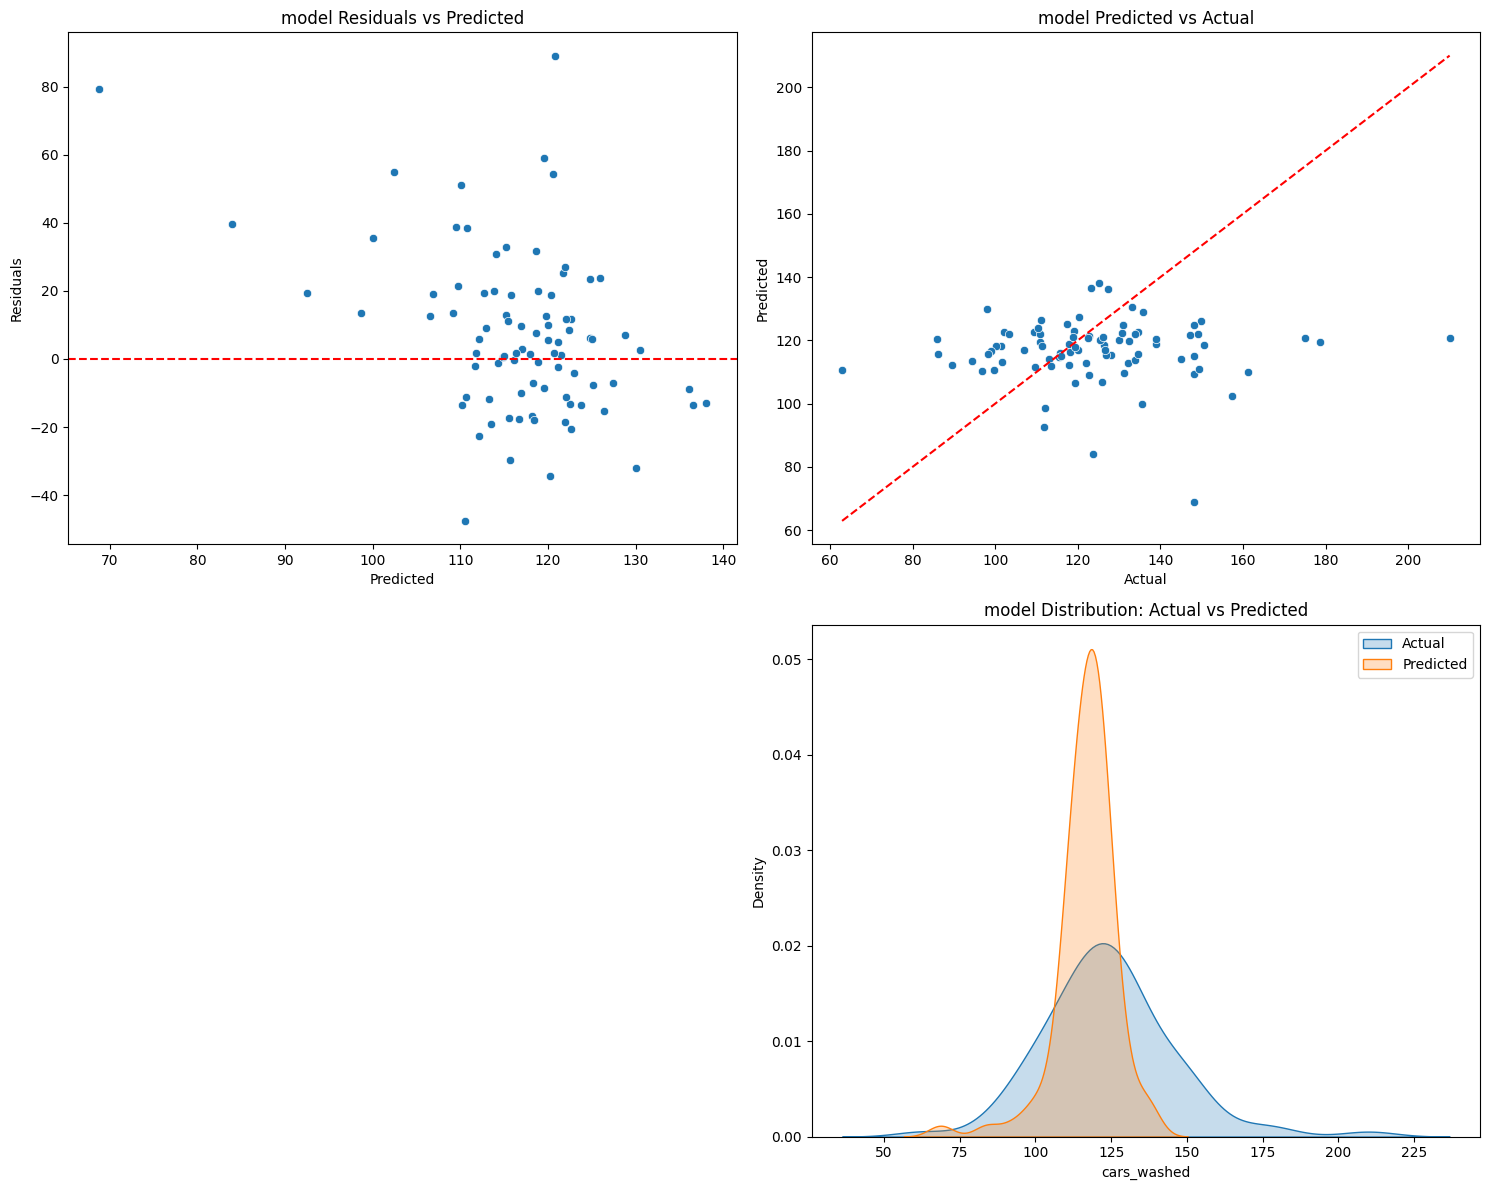

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import root_mean_squared_error, mean_squared_error, mean_absolute_error, r2_score


def evaluate_model(y_test, y_pred, model_name):
    # Residuals
    residuals = y_test - y_pred

    # Residual Plot
    plt.figure(figsize=(15, 12))
    
    plt.subplot(2, 2, 1)
    sns.scatterplot(x=y_pred, y=residuals)
    plt.axhline(0, color='r', linestyle='--')
    plt.title(f'{model_name} Residuals vs Predicted')
    plt.xlabel("Predicted")
    plt.ylabel("Residuals")

    # Predicted vs Actual
    plt.subplot(2, 2, 2)
    sns.scatterplot(x=y_test, y=y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.title(f'{model_name} Predicted vs Actual')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")


    plt.subplot(2, 2, 4)
    sns.kdeplot(y_test, label='Actual', fill=True, clip=(0, None))
    sns.kdeplot(y_pred, label='Predicted', fill=True, clip=(0, None))
    plt.title(f'{model_name} Distribution: Actual vs Predicted')
    plt.xlabel('cars_washed')
    plt.ylabel('Density')
    plt.legend()

    plt.tight_layout()
    plt.show()

evaluate_model(y_test, y_pred, "model")

In [103]:


def evaluate_results(y_pred, y_test, model_name, threshold):
    
    rmse = root_mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    percentage_error = (np.abs(y_test - y_pred) / y_test) <= threshold
    accuracy = np.mean(percentage_error) * 100

    print(f"For {model_name}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"ACCURACY(within {threshold*100}%): {accuracy:.4f}%")
    print(f"R2: {r2:.4f}")

evaluate_results(y_test, y_pred, "model", 0.15)

For model
RMSE: 24.7799
MAE: 18.1109
ACCURACY(within 15.0%): 59.3023%
R2: -5.3049
